In [13]:
from typing import List
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statistics 
import torch
from pathlib import Path
import os
import sys; sys.path.append('../runscripts')
import constants
import accuracy_no_progressive_shrinking as acc_script
import ws_run
import pickle

## Retrieve individual run output

In [2]:
## get accuracy from individual runs.
def get_individual_accuracy(model_name: str, output_dir: Path) -> List[float]:
    pt_file = model_name + '_test_acc.pt'
    pt_file = output_dir / pt_file
    if not os.path.isfile(pt_file):
        return 'N/A'
    acc = np.max(torch.load(pt_file))
    return acc

## Helper Functions to retrieve WS trainig output

In [7]:
def get_ws_acc(run_id):
    output_dir = ws_run.get_outputs_dir(run_id)
    log_file_name = ws_run.get_log_file_name(run_id)+"_test_acc.pt"
    pt_file = output_dir/log_file_name
    data = torch.load(pt_file)
    return data 
def get_ws_train_config(run_id,verbose=False):
    output_dir = ws_run.get_outputs_dir(run_id)
    train_config = pickle.load((output_dir / 'config.pkl').open('rb'))
    if verbose:
        print(train_config)
    return train_config
def get_ws_labels(acc_data):
    first_result = acc_data[0][1]
    labels=[]
    for item in first_result:
        label = "["+str(item[0])+" , "+str(item[1])+"]"
        labels.append(label)
    return labels


def get_ws_epoch_acc_list(acc_data, interval=1):
    ## returns a list of accuracy results across epochs.
    ## interval : the interval for which we want to print the accuracy result.
    acc_list=[]
    idx=0
    while idx < len(acc_data):
        epoch = acc_data[idx]
        accs = [val[2] for val in epoch[1]]
        acc_list.append((idx,accs))
        idx+=interval
    return acc_list

## Create Graph

In [34]:
## individual run should match the ws run configuration
def create_graph_per_epoch(acc_data,interval=1, title="N/A", fig_name="N/A",figsize=(20, 10),individual_run=None,last_only=False):
    plt.clf()
    #first we need to get the labels
    labels = get_ws_labels(acc_data)
    ##now create graph.
    acc_list = get_ws_epoch_acc_list(acc_data,interval)

    if last_only:
        plt.plot(labels,acc_list[-1][1],label="weight shared")
    else:
        for idx,accs in acc_list:
            plt.plot(labels,accs,label=idx)
    if individual_run is not None:
        plt.plot(labels, individual_run,label="individual run")
    plt.xlabel("model configuration")
    plt.ylabel("accuracy")
    plt.legend()
    plt.title(title)
    plt.savefig(fig_name)
    plt.show()

        

## Get output Graph

In [28]:
RUN_ID = "elastic_layer_only_2"

In [29]:
acc_data = get_ws_acc(RUN_ID)

In [30]:
## Print out configuration and final accuracy
get_ws_train_config(RUN_ID, verbose=True)
## final accuracy
acc_data[-1]

{'id': 'elastic_layer_only_2', 'layer_config': [2, 4, 6, 8, 10, 12], 'attention_config': None, 'attention_approach': None}


(0.8454241071428572,
 [(2, 1.0, 0.8339285714285715),
  (6, 1.0, 0.7254464285714286),
  (10, 1.0, 0.9035714285714286),
  (12, 1.0, 0.9187500000000001)])

In [21]:
## optinally we can retrieve individual run data as well.
input_list = [x.split("/")[-1] for x in constants.VARY_ENCODER_LAYER]
acc_dir = acc_script.get_layer_output_dir(id="11_12")
individual_run=[]
for i in range(3):
    model_name = input_list[int(len(input_list)/3 * i)]
    individual_run.append(get_individual_accuracy(model_name,acc_dir))
individual_run.append(get_individual_accuracy(input_list[-1],acc_dir))

print(individual_run)

[0.8508928571428571, 0.8957589285714286, 0.9154017857142858, 0.9180803571428572]


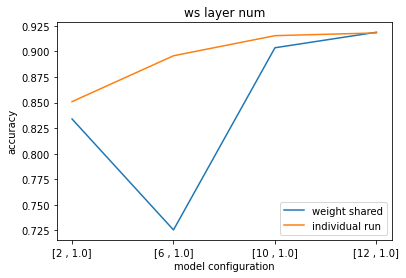

In [35]:
## create graph 
create_graph_per_epoch(acc_data,interval=1,title="ws layer num",fig_name="ws_layer_num",individual_run=individual_run,last_only=True)

## Scratch work

ignore the below code

In [9]:
file_name='elastic_layer_only_2_layer_[2, 4, 6, 8, 10, 12]_test_acc.pt'
acc_dir = ws_run.get_outputs_dir('elastic_layer_only_2_layer_[2, 4, 6, 8, 10, 12]')
pt_file = acc_dir/file_name
acc_data=torch.load(pt_file)

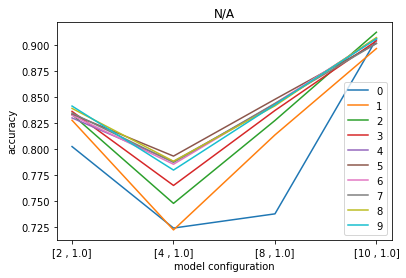

In [21]:
create_graph_per_epoch(acc_data,interval=1)